In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [274]:
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
df=pd.read_csv('boston_house.csv')

In [3]:
df.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4


In [11]:
# check any null values
# df.isnull().sum()   # clear
df.shape

(506, 14)

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


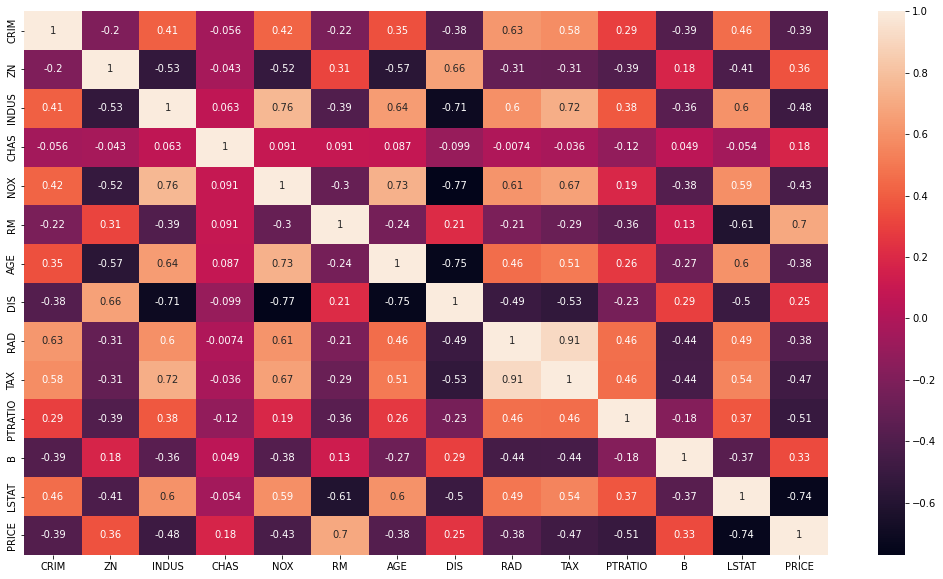

In [12]:
# finding out correlation between features
data_corr=df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(data_corr,annot=True)
plt.show()

In [7]:
import warnings
warnings.filterwarnings('ignore')

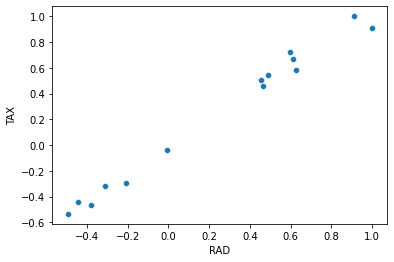

In [9]:
# some feature looking correlate each other 'RAD', 'TAX'
# we check through scaterplot

sns.scatterplot('RAD','TAX',data=data)
plt.show()

In [16]:
#dividing features and label data
x=df.iloc[:,:-1]
y=df['PRICE']

In [18]:
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler as SS
from sklearn.model_selection import GridSearchCV


In [22]:
from sklearn.ensemble import AdaBoostRegressor as ABR
from sklearn.metrics import r2_score

In [23]:
# adaboost model training
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.25,random_state=49)

In [25]:
ada=ABR()

In [26]:
ada.fit(xtrain,ytrain)

AdaBoostRegressor()

In [27]:
# check traing performance
pred=ada.predict(xtrain)
r2_score(ytrain,pred)

0.9182326733123347

In [28]:
# check test data score performance
y_pred=ada.predict(xtest)
r2_score(ytest,y_pred)

0.7904337690820147

In [29]:
from sklearn.model_selection import RandomizedSearchCV

In [80]:
# we using Hyper parameter Tuning with Ranadomsearchcv

param={'n_estimators':[40,50,60,70,90],'learning_rate':[0.092,0.1,0.19,0.24,0.31,0.4,0.49]}
rcv=RandomizedSearchCV(ABR(),cv=4,param_distributions=param,n_jobs=-1)

In [81]:
rcv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=4, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.092, 0.1, 0.19,
                                                          0.24, 0.31, 0.4,
                                                          0.49],
                                        'n_estimators': [40, 50, 60, 70, 90]})

In [82]:
print('best_estimators=',rcv.best_estimator_)
boost=rcv.best_estimator_

best_estimators= AdaBoostRegressor(learning_rate=0.31, n_estimators=60)


In [85]:
boost.fit(xtrain,ytrain)

AdaBoostRegressor(learning_rate=0.31, n_estimators=60)

In [86]:
y_pred=boost.predict(xtest)
r2_score(ytest,y_pred)

0.7863312512994257

In [60]:
# tuning with Gridsearchcv
gcv=GridSearchCV(ABR(),param_grid=param,cv=5)

In [87]:
gcv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.092, 0.1, 0.19, 0.26, 0.39, 0.42,
                                           0.56],
                         'n_estimators': [40, 50, 60, 70, 90]})

In [88]:
print(gcv.best_estimator_)

AdaBoostRegressor(learning_rate=0.56, n_estimators=90)


In [89]:
boost2=gcv.best_estimator_

In [79]:
boost2.fit(xtrain,ytrain)
boost2.score(xtest,ytest)

0.7935007084731466

In [211]:
#  1st manual
ad=ABR(learning_rate=0.452,n_estimators=80,random_state=40)
ad.fit(xtrain,ytrain)
pred1=ad.predict(xtest)
print(r2_score(ytest,pred1))
print(ad.score(xtest,ytest))

0.8323512461443776
0.8323512461443776


In [212]:
ytest

391    23.2
110    21.7
329    22.6
323    18.5
149    15.4
       ... 
221    21.7
104    20.1
53     23.4
69     20.9
503    23.9
Name: PRICE, Length: 127, dtype: float64

In [183]:
ad.predict(xtest)

array([15.17124183, 20.77972973, 25.30617284, 21.01414141, 12.75647059,
       12.74835165, 25.30617284, 21.26956522, 23.20521739, 21.26956522,
       24.17439024, 21.83891892, 16.79319372, 20.61428571, 44.42692308,
       11.75208333, 38.95      , 21.02488688, 32.07047619, 18.63760684,
       22.05666667, 20.40227273, 37.93125   , 12.40441176, 24.22891566,
       14.61716418, 32.31428571, 32.96956522, 20.77972973, 22.05666667,
       12.63548387, 11.75208333, 34.89166667, 17.715625  , 20.87089947,
       25.30617284, 29.62222222, 11.95      , 20.77972973, 15.50853659,
       15.71463415, 45.36216216, 12.63548387, 20.76821705, 36.728     ,
       17.49675926, 12.00238095, 20.87089947, 20.87089947, 22.83212121,
       23.99356436, 21.26956522, 21.26956522, 11.75208333, 32.53648649,
       20.77972973, 15.66607143, 22.31949686, 21.02488688, 27.37258065,
       22.05666667, 20.61428571, 17.65      , 17.715625  , 18.98025478,
       20.54705882, 12.125     , 22.64021164, 13.02542373, 32.53

In [214]:
df1=pd.read_csv('heart_dieses.csv')

In [216]:
df1.head(4)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


In [217]:
df1=df1.drop(['Unnamed: 0'],axis=1)

In [220]:
df1.shape

(303, 14)

In [222]:
x=df1.iloc[:,:-1]
y=df1['target']

In [226]:
# check just find correlation with features beetween target 
corr=x.corrwith(y)
corr

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
dtype: float64

<AxesSubplot:title={'center':'correlation with target'}>

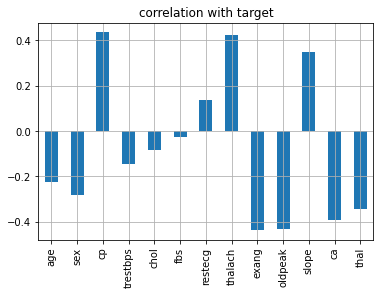

In [228]:
# plotting
corr.plot(kind='bar' ,grid=True ,title='correlation with target' ,)

In [229]:
from sklearn.feature_selection import SelectPercentile,chi2

In [231]:
percentile=SelectPercentile(score_func=chi2,percentile=80)

In [232]:
percent=percentile.fit(x,y)

In [234]:
# seperate the feature to check p_values
cols=percent.get_support(indices= True)

In [247]:
features=x.columns[cols]
features

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca'],
      dtype='object')

In [240]:
df_score=pd.DataFrame({'features':x.columns,'chi2score':percent.scores_,'p_value':percent.pvalues_})

In [244]:
df_score.sort_values(by='chi2score',ascending=False)

,features,chi2score,p_value
7,thalach,188.320472,7.395102e-43
9,oldpeak,72.644253,1.552583e-17
11,ca,66.440765,3.605677e-16
2,cp,62.598098,2.534982e-15
8,exang,38.914377,4.428074e-10
4,chol,23.936394,9.957148e-07
0,age,23.286624,1.395673e-06
3,trestbps,14.823925,1.180286e-04
10,slope,9.804095,1.741237e-03
1,sex,7.576835,5.912318e-03


In [246]:
x[features]

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca
0,63,1,3,145,233,150,0,2.3,0,0
1,37,1,2,130,250,187,0,3.5,0,0
2,41,0,1,130,204,172,0,1.4,2,0
3,56,1,1,120,236,178,0,0.8,2,0
4,57,0,0,120,354,163,1,0.6,2,0
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,123,1,0.2,1,0
299,45,1,3,110,264,132,0,1.2,1,0
300,68,1,0,144,193,141,0,3.4,1,2
301,57,1,0,130,131,115,1,1.2,1,1


In [249]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [248]:
X=x[features]

In [251]:
xtrain,xtest,ytrain,ytest=tts(X,y,test_size=0.25,random_state=49)

In [250]:
gbc=GBC()

In [252]:
gbc.fit(xtrain,ytrain)

GradientBoostingClassifier()

In [253]:
gbc.score(xtrain,ytrain)

0.9955947136563876

In [254]:
gbc.score(xtest,ytest)

0.7894736842105263

In [325]:
param={'max_depth':range(5,10,) ,'min_samples_split':range(3,11) ,'learning_rate':np.arange(0.1,0.5,0.01)}

In [326]:
gs=GridSearchCV(GBC(),param_grid=param,cv=3,)

In [ ]:
gs.fit(xtrain,ytrain)

In [266]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'min_samples_split': 9}

In [309]:
# manual model
gb=GBC(learning_rate= 0.39, max_depth= 9, min_samples_split= 3)

In [310]:
gb.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.39, max_depth=9, min_samples_split=3)

In [311]:
gb.score(xtest,ytest)

0.7894736842105263

In [293]:
pred2=gb.predict(xtest)
print(classification_report(ytest,pred2))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76        43
           1       0.68      0.82      0.74        33

    accuracy                           0.75        76
   macro avg       0.75      0.76      0.75        76
weighted avg       0.76      0.75      0.75        76



In [321]:
np.arange(0.1,0.5,0.01)

array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49])